In [29]:
clear all
close all
pkg load signal
set(0,'defaultlinelinewidth',2.5)

### Uppgift 1 : Fourierapproximation med matrismultiplikation
  
- (a) Konstruera en funktion `expbas = @(n,t,omega0) ...` som returnerar en **basmatris** av dimension $(2n+1)\times \mathtt{length(t)}$ för exponentialbasen: Varje rad ger en basfunktion $e^{ik\omega_0 t}$ evaluerad för $t$ i vektorn `t`. Raderna bör vara ordnade så att frekvensmultiplarna ges av `k=ifftshift(-n:n)`. (Se nedan) Testa funktionen genom anropet `expbas(3,linspace(-pi,pi,5),1)`.
- (b) Använd basmatrisfunktionen för att beräkna fourierkoefficienterna för funktionen $f(t)=\mathtt{sawtooth(\cdot,0.5)}$ som plottas nedan. Plotta deras amplitudspektrum. Med rätt skalning skall det räcka med matrismultiplikation för beräkningen. Notera också att MATLABs transponeringsoperation $\mathtt A \mapsto \mathtt{A'}$ komplexkonjugerar elementen. (*Hermitisk* matristransponering). 
- (c) Plotta i samma bild den fouriersummorna $S_2 f(t)$ och $S_4 f(t)$ samt $f(t)$. Notera att även $S_n f$ bör erhållas med matrismultiplikation. 


In [37]:
ifftshift(-7:7)

ans =

   0   1   2   3   4   5   6   7  -7  -6  -5  -4  -3  -2  -1



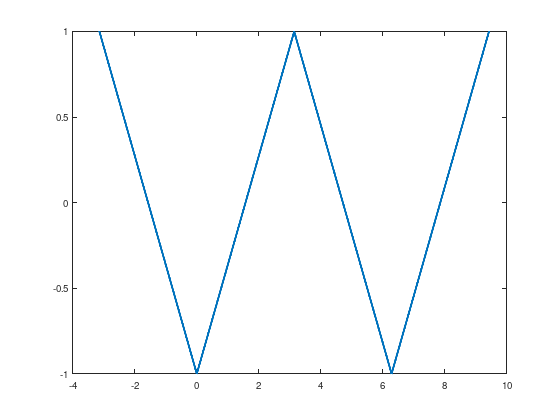

In [31]:
t = linspace(-pi,3*pi,301);
plot(t,sawtooth(t,0.5))

# Uppgift 2: Komplexa slutna kurvor

Betrakta den komplexa kurvan $z:[0,1]\to \mathbb C$ 
$$
  z(t) = \begin{cases} 
          4t + i(4t)^2 & 0\le t <t/4 \\
          \exp(i\pi(\frac 14 + 3(t-\frac 14))) & \frac 14 < t \le \frac 34 \\
          4(1-t) - i(4(1-t))^2 & \frac 34 < t \le 1
          \end{cases}
$$
plottad nedan. Observera att vi gör en periodisk utvidgning av $z$ med hjälp av `mod(t,1)`.

Nedan konstrueras en *komplexvärd* 1-periodisk funktion $z(t)$ som beskrivs av en hjärtformad kurva i $\mathbb C$. Man använder `fft` och `ifft` för att beräkna fourierapproximationen nedan. 
  
- (a) Beräkna och plotta $7$:e fourierapproximationen $\displaystyle S_7 z (t) = \sum_{k=-7}^7 \hat z(k) e^{i2\pi k t}$ genom att använda en basmatris för exponentialbasen som ovan. Plotta amplitudspektrat och jämför med den som erhålls nedan. 
- (b) Ändra genom lämplig skalning amplitudspektrat nedan så att istället för frekvensmultipel $k$ vi använder $f$ uttryckt i Hz. 

N = 401


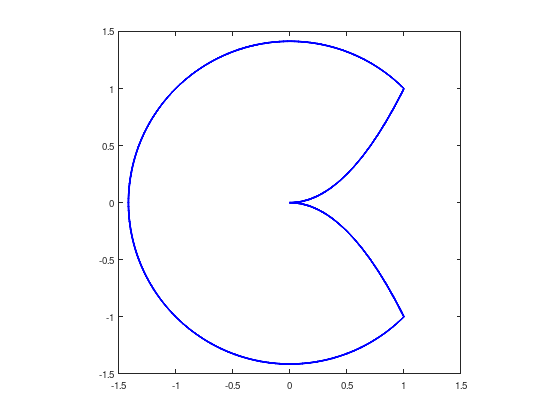

In [32]:
K=200;
N = 2*K+1
t = linspace(0,1.0,N); % Intervallet [0,1]

f1 = @(t) (4*t) + i*(4*t).^2;
f2 = @(t) sqrt(2)*exp(i*pi*(1/4 .+ (t-0.25)*3));
f3 = @(t) (4*(1-t)) .- i*(4*(1-t)).^2;
z1 = @(t) f1(t) .* (t<=0.25) + f2(t) .* (t>0.25 & t <= 0.75) + f3(t) .* (t > 0.75);
z = @(t) z1(mod(t,1)); % Periodisk utvidgning

figure(1)
plot(real(z(t)),imag(z(t)),'b-')
pbaspect([1 1])
axis([-1.5 1.5 -1.5 1.5])


Här beräknas fourierkoefficienterna av vektorn `y` med `fft` och sparas i vektorn `Y`. 


In [33]:
y = z(t);
Y = fft(y); % Fouriertransformen (den diskreta)
k = ifftshift(-K:K); % Frekvensmultiplar ordnade som 0,1,2,...,K,-K,...,-1

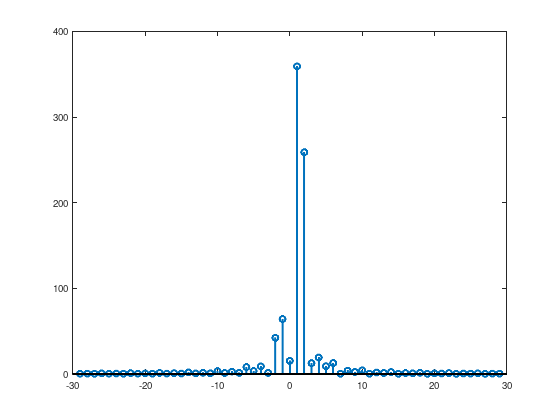

In [34]:
ix = abs(k) < 30; % tar inte med alla frekvenser
stem(k(ix),abs(Y(ix)))

Plotten av amplitudspektrat bör ange frekvens $\mathsf{f}$ längs $x$-axeln. 

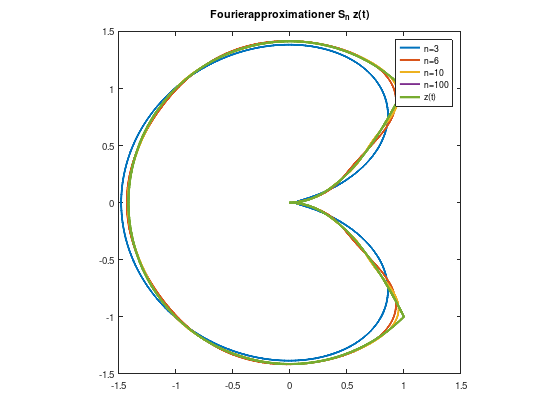

In [36]:
y3 = ifft(Y .* (abs(k) <= 3));
y7 = ifft(Y .* (abs(k) <= 6));
y10 = ifft(Y .* (abs(k) <= 10));
y100 = ifft(Y .* (abs(k) <= 100));

figure(1)
plot(real(y3),imag(y3),
real(y7),imag(y7),
real(y10),imag(y10),
real(y100),imag(y100),
'linewidth',2,real(y),imag(y),'linewidth',3)
pbaspect([1 1])
legend('n=3','n=6','n=10','n=100','z(t)')
axis([-1.5 1.5 -1.5 1.5])
title("Fourierapproximationer S_n z(t)")